# First digits, last digits

## Introduction

In the field of data science or data analyst, you don't always have access to easy-to-interpret data. Sometimes, seemingly unrelated data is also analyzed. In this way, we will try to find patterns by extracting numbers in two ways.

In this project, we will be using two method which are extraction of first digits and last digits from CSV file. Also we will be filtering the text file to only find the numbers and apply our method.

With extracted first digits and last digits, we will be using visual graph to see the frequency in which digit has been used the most then analyze the reason mostly used.

In [1]:
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We will be creating a function called `fd(x)` which take the numbers as an input.

Using `string.printable` application, we save 1~ 9 as a string.

After converting our input numbers into string, we check through each string to see if there are anything that does not match with saved string list(1~9).

In this process, we will be ignoring floating point, negative sign and zeros.

By checking each string, we return the digit that first match to our saved string list(1~9).
If nothing match until the end, we return 0.

In [2]:
def fd(x): #First digit function
    one_to_nine = string.printable[1:10] #list of 1~9 digits in string into list 
    x_str = str(x) # convert input numbers into string
    for i in range(len(x_str)): # check through each input string
        if x_str[i] in one_to_nine: # if the string contain the digit,
            return x_str[i] # return that digit
            break # break since we found first digit
    else: # if nothing found,
        return str(0) # return 0
            

In [3]:
fd(123.45)

'1'

In [4]:
fd(-75)

'7'

In [5]:
fd(0.00345)

'3'

In [6]:
fd(0.0)

'0'

We will be creating a function called `ld(x)` which take the numbers as an input.

Using `string.printable` application, we save 1~ 9 as a string.

After converting our input numbers into string, we check through each string to see if there are anything that does not match with saved string list(1~9).

In this process, we will be ignoring floating point, negative sign and zeros.

By checking each string, we return the last digit that first match to our saved string list(1~9).
If nothing match until the end, we return 0.

In [7]:
def ld(x): # Last digit function
    one_to_nine = string.printable[1:10] #list of 1~9 digits in string into list 
    x_str = str(x) # convert input numbers into string
    for i in reversed(range(len(x_str))): # check through each input string in reversed order
        if x_str[i] in one_to_nine: # if the string contain the digit,
            return x_str[i] # return that digit
            break # break since we found last digit
    else: # if nothing found,
        return str(0) # return 0
            

In [8]:
ld(-123.45)

'5'

In [9]:
ld(42000.00)

'2'

In [10]:
ld(0.0)

'0'

Now we have our 2 methods ready, we will be exploring two CSV file and one text file then find a pattern with the methods.

## Part 1

### Country Area 

Our first data is an information that contains the size of each country in two units.($km^2$, $mi^2$)

In [11]:
CA=pd.read_csv("country_areas.csv" # filename
                   ,delimiter="," # delimiter
                   ,skiprows=2 #number of rows to skip
                   ,header=0 # row number where the header is
                   ,encoding='latin1'
                   ,low_memory=False)
CA=CA.fillna(0) # fill 0 where data is empty

In [12]:
CA.head(10) #first ten rows of data

,Country Name,Country Code,Area (sq km),Area (sq miles)
0,Afghanistan,AFG,652860.0,252071
1,Albania,ALB,28750.0,11100
2,Algeria,DZA,2381740.0,919595
3,American Samoa,ASM,200.0,77
4,Andorra,AND,470.0,182
5,Angola,AGO,1246700.0,481353
6,Antigua and Barbuda,ATG,440.0,170
7,Argentina,ARG,2780400.0,1073518
8,Armenia,ARM,29740.0,11483
9,Aruba,ABW,180.0,70


In [13]:
CA_kmf = CA["Area (sq km)"].apply(fd) # apply first digit function to km unit values
CA_kmf

0      6
1      2
2      2
3      2
4      4
      ..
205    3
206    6
207    5
208    7
209    3
Name: Area (sq km), Length: 210, dtype: object

In [14]:
CA_kml = CA["Area (sq km)"].apply(ld) # apply last digit function to km unit values
CA_kml

0      6
1      5
2      4
3      2
4      7
      ..
205    5
206    2
207    7
208    1
209    6
Name: Area (sq km), Length: 210, dtype: object

In [15]:
CA_kmf_count= pd.Index(CA_kmf).value_counts().sort_index() # count how many times used for each digit(1~9)
CA_kmf_count

1    60
2    37
3    25
4    24
5    16
6    13
7    15
8     9
9    11
Name: Area (sq km), dtype: int64

In [16]:
CA_kml_count= pd.Index(CA_kml).value_counts().sort_index() # count how many times used for each digit(1~9)
CA_kml_count

1    18
2    24
3    20
4    25
5    26
6    28
7    31
8    17
9    21
Name: Area (sq km), dtype: int64

Country area in miles

In [17]:
CA_mif = CA["Area (sq miles)"].apply(fd) # apply first digit function to mi unit values
CA_mif

0      2
1      1
2      9
3      7
4      1
      ..
205    1
206    2
207    2
208    2
209    1
Name: Area (sq miles), Length: 210, dtype: object

In [18]:
CA_mil = CA["Area (sq miles)"].apply(ld) # apply last digit function to mi unit values
CA_mil

0      1
1      1
2      5
3      7
4      2
      ..
205    5
206    4
207    5
208    4
209    3
Name: Area (sq miles), Length: 210, dtype: object

In [19]:
CA_mif_count= pd.Index(CA_mif).value_counts().sort_index() # count how many times used for each digit(1~9)
CA_mif_count

1    72
2    34
3    28
4    24
5     9
6    11
7    15
8     7
9    10
Name: Area (sq miles), dtype: int64

In [20]:
CA_mil_count= pd.Index(CA_mil).value_counts().sort_index() # count how many times used for each digit(1~9)
CA_mil_count

1    25
2    22
3    31
4    23
5    21
6    21
7    26
8    18
9    23
Name: Area (sq miles), dtype: int64

Text(0.5, 0.98, 'Fd & Ld of km&mile')

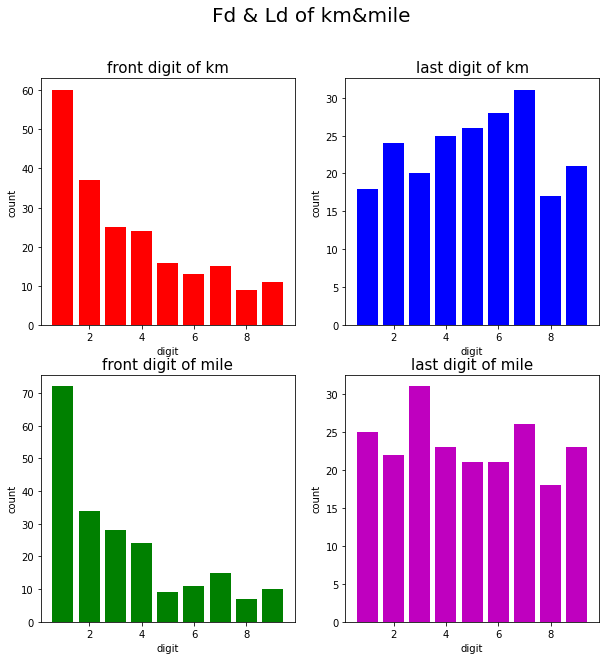

In [21]:
x=[1,2,3,4,5,6,7,8,9] # digits we consider

plt.figure(figsize=(10,10))

# plot of first digits count in km
plt.subplot(2,2,1)
plt.bar(x,CA_kmf_count,color='r')
plt.title('front digit of km',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of last digits count in km
plt.subplot(2,2,2)
plt.bar(x,CA_kml_count,color='b')
plt.title('last digit of km',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of first digits count in mi
plt.subplot(2,2,3)
plt.bar(x,CA_mif_count,color='g')
plt.title('front digit of mile',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of last digits count in mi
plt.subplot(2,2,4)
plt.bar(x,CA_mil_count,color='m')
plt.title('last digit of mile',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

plt.suptitle('Fd & Ld of km&mile',fontsize=20)

### Analyze

From the histogram result, both area in km and miles front digit of 1 were returned the most.
For the last digits, area in km returned 7 as most used and 3 in miles.

First, we observe the pattern for the first digit by checking the max, min, and average.

In [22]:
maxkm = CA["Area (sq km)"].max() #maximum of km value
maxkm

17098250.0

In [23]:
minkm = CA["Area (sq km)"].min() # minimum of km value
minkm

2.0

In [24]:
avgkm = CA["Area (sq km)"].mean() # average of km value
avgkm

636708.9357142857

In [25]:
middlekm = CA["Area (sq km)"].median() # median of km value
middlekm

105945.0

Area($km^2$)

While the maximum was 17,098,250, minimum was 2, average was 636,708, and median was 105,945, we were able to find out that 1 has the most probability to occur. 

By looking at the range of area in km, 0 ~ 10,000,000 contains each digits evenly distributed. 

However, the range continues further until 17,098,250 which any countries above 10,000,000 will return 1 as a first digit. 

Also, we can make one assumption for 1 being most used since the median appears to be 105,945. 



In [26]:
maxmi = CA["Area (sq miles)"].max() # maximum of mile value
maxmi

6601669

In [27]:
minmi = CA["Area (sq miles)"].min() # minimum of mile value
minmi

1

In [28]:
avgmi = CA["Area (sq miles)"].mean() # average of mile value
avgmi

245834.6476190476

In [29]:
middlemi = CA["Area (sq miles)"].median() # median of mile value
middlemi

40906.0

Area($mi^2$)

While the maximum was 6,601,669, minimum was 1, average was 245,834, and median was 40,906, we were able to find out that 1 has the mostly occured. 

Converting square kilometers to square miles is 
$$ 1km^2 \approx 0.3861 mi^2$$

While we made assumption above, if most of the values are distributed around 100,000 $km^2$, then $mi^2$ must return 4 as most. However, since 1 is still the most used first digit, we can verify the range more specific by considering the median and average. 

While the conversion of 100,000 ~ 199,999 $mi^2$ is about 260,000 ~ 518,000 $km^2$, and those range fall in between the median of 105,945 $km^2$ and average of 636,708 $km^2$,

we are able to conclude most of countries area are distributed in range between 260,000~518,000 $km^2$ and the range 0 ~ 17,098,250 $km^2$ have returned 1 as first digit that mostly used.



However, there are no pattern found in last digit for both units. 7 was the most used in $km^2$ and 3 for $mi^2$.

last digits were almost equally distributed since they had equal probability to be used. 



### Country Populations

Our second data contains information of populations for each country since 1960 to 2014.

In [30]:
CP=pd.read_csv("country_populations.csv" # filename
                   ,delimiter="," # delimiter
                   ,skiprows=0 #number of rows to skip
                   ,header=0 # row number where the header is
                   ,encoding='latin1'
                   ,low_memory=False)
CP=CP.fillna(0) # fill with 0 where the data is empty

In [31]:
CP.head(10) # print first 10 rows of data

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,AFG,8994793.0,9164945.0,9343772.0,9531555.0,9728645.0,9935358.0,10148841.0,10368600.0,...,24399948,25183615,25877544,26528741,27207291,27962207,28809167,29726803,30682500,31627506
1,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,3011487,2992547,2970017,2947314,2927519,2913021,2904780,2900489,2897366,2894475
2,Algeria,DZA,11124892.0,11404859.0,11690152.0,11985130.0,12295973.0,12626953.0,12980269.0,13354197.0,...,33267887,33749328,34261971,34811059,35401790,36036159,36717132,37439427,38186135,38934334
3,American Samoa,ASM,20012.0,20478.0,21118.0,21883.0,22701.0,23518.0,24320.0,25116.0,...,59117,58648,57904,57031,56226,55636,55316,55227,55302,55434
4,Andorra,AND,13414.0,14376.0,15376.0,16410.0,17470.0,18551.0,19646.0,20755.0,...,81223,83373,84878,85616,85474,84419,82326,79316,75902,72786
5,Angola,AGO,5270844.0,5367287.0,5465905.0,5565808.0,5665701.0,5765025.0,5863568.0,5962831.0,...,17912942,18541467,19183907,19842251,20520103,21219954,21942296,22685632,23448202,24227524
6,Antigua and Barbuda,ATG,54681.0,55403.0,56311.0,57368.0,58500.0,59653.0,60818.0,62002.0,...,82565,83467,84397,85350,86300,87233,88152,89069,89985,90900
7,Argentina,ARG,20619075.0,20953079.0,21287682.0,21621845.0,21953926.0,22283389.0,22608747.0,22932201.0,...,39145491,39558750,39969903,40381860,40798641,41222875,41655616,42095224,42538304,42980026
8,Armenia,ARM,1867396.0,1934239.0,2002170.0,2070427.0,2138133.0,2204650.0,2269475.0,2332624.0,...,3014917,3002161,2988117,2975029,2966108,2963496,2967984,2978339,2992192,3006154
9,Aruba,ABW,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,57712.0,58049.0,...,100031,100830,101218,101342,101416,101597,101936,102393,102921,103441


In [32]:
CP_1990f = CP["1990"].apply(fd) # apply first digit function to 1990 population values
CP_1990f

0      1
1      3
2      2
3      4
4      5
      ..
206    6
207    1
208    1
209    8
210    1
Name: 1990, Length: 211, dtype: object

In [33]:
CP_1990l = CP["1990"].apply(ld) # apply last digit function to 1990 population values
CP_1990l

0      7
1      2
2      4
3      4
4      1
      ..
206    7
207    3
208    9
209    2
210    1
Name: 1990, Length: 211, dtype: object

In [34]:
CP_2000f = CP["2000"].apply(fd) # apply first digit function to 2000 population values
CP_2000f

0      1
1      3
2      3
3      5
4      6
      ..
206    7
207    1
208    1
209    1
210    1
Name: 2000, Length: 211, dtype: object

In [35]:
CP_2000l = CP["2000"].apply(ld) # apply last digit function to 2000 population values
CP_2000l

0      4
1      7
2      8
3      2
4      9
      ..
206    9
207    9
208    9
209    2
210    1
Name: 2000, Length: 211, dtype: object

In [36]:
CP_2010f = CP["2010"].apply(fd) # apply first digit function to 2010 population values
CP_2010f

0      2
1      2
2      3
3      5
4      8
      ..
206    8
207    1
208    2
209    1
210    1
Name: 2010, Length: 211, dtype: object

In [37]:
CP_2010l = CP["2010"].apply(ld) # apply last digit function to 2010 population values
CP_2010l

0      7
1      1
2      9
3      6
4      9
      ..
206    5
207    7
208    2
209    9
210    7
Name: 2010, Length: 211, dtype: object

In [38]:
CP1990f_count= pd.Index(CP_1990f).value_counts().sort_index() # return counted values with sorted index
CP1990f_count

1    61
2    31
3    26
4    25
5    21
6     9
7    17
8     9
9    12
Name: 1990, dtype: int64

In [39]:
CP1990l_count= pd.Index(CP_1990l).value_counts().sort_index() # return counted values with sorted index
CP1990l_count

1    22
2    26
3    17
4    26
5    25
6    24
7    17
8    24
9    30
Name: 1990, dtype: int64

In [40]:
CP2000f_count= pd.Index(CP_2000f).value_counts().sort_index() # return counted values with sorted index
CP2000f_count

1    66
2    30
3    26
4    23
5    18
6    18
7     9
8    15
9     6
Name: 2000, dtype: int64

In [41]:
CP2000l_count= pd.Index(CP_2000l).value_counts().sort_index() # return counted values with sorted index
CP2000l_count

1    21
2    23
3    27
4    17
5    27
6    25
7    20
8    28
9    23
Name: 2000, dtype: int64

In [42]:
CP2010f_count= pd.Index(CP_2010f).value_counts().sort_index() # return counted values with sorted index
CP2010f_count

1    59
2    37
3    26
4    20
5    20
6    14
7    12
8    12
9    11
Name: 2010, dtype: int64

In [43]:
CP2010l_count= pd.Index(CP_2010l).value_counts().sort_index() # return counted values with sorted index
CP2010l_count

1    17
2    22
3    23
4    23
5    24
6    28
7    36
8    17
9    21
Name: 2010, dtype: int64

Plot the result into histogram for better visual

Text(0.5, 0.98, 'Fd & Ld of populations')

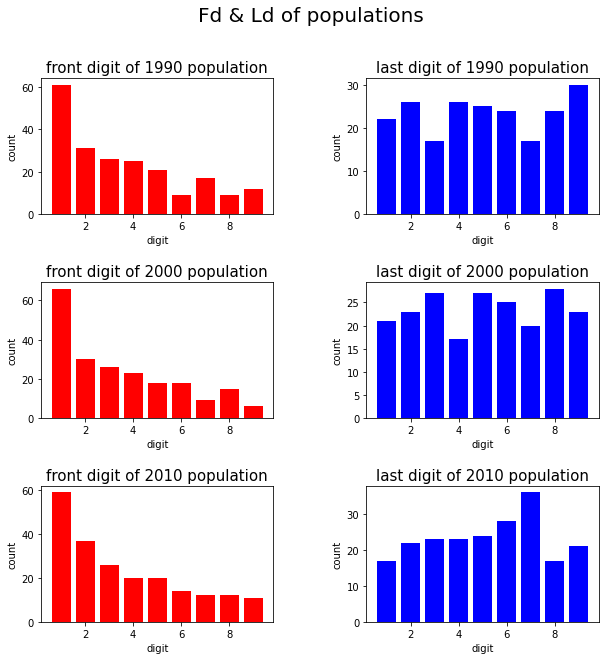

In [44]:
x=[1,2,3,4,5,6,7,8,9] # digits we consider

plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.4,hspace=0.5)

# plot of first digits count in 1990 population
plt.subplot(3,2,1)
plt.bar(x,CP1990f_count,color='r')
plt.title('front digit of 1990 population',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of last digits count in 1990 population
plt.subplot(3,2,2)
plt.bar(x,CP1990l_count,color='b')
plt.title('last digit of 1990 population',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of first digits count in 2000 population
plt.subplot(3,2,3)
plt.bar(x,CP2000f_count,color='r')
plt.title('front digit of 2000 population',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of last digits count in 2000 population

plt.subplot(3,2,4)
plt.bar(x,CP2000l_count,color='b')
plt.title('last digit of 2000 population',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of first digits count in 2010 population
plt.subplot(3,2,5)
plt.bar(x,CP2010f_count,color='r')
plt.title('front digit of 2010 population',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of last digits count in 2010 population
plt.subplot(3,2,6)
plt.bar(x,CP2010l_count,color='b')
plt.title('last digit of 2010 population',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

plt.suptitle('Fd & Ld of populations',fontsize=20)

### Analyze

We have histogram of first digit and last digit of 1990, 2000, 2010.

First digit of all three years returned 1 as most used. 

Last digit from 1990 returned 9, 2000 returned 8, and 2010 returned 7 as most used.

First, we observe the pattern for the first digit by checking the max, min, average, and median.

In [45]:
max90 = CP["1990"].max() # maximum value
min90 = CP["1990"].min() #minimum value
avg90 = CP["1990"].mean() # average value
middle90 = CP["1990"].median() #median value

print(max90,'\n',min90,'\n',avg90,'\n',middle90)

1135185000 
 9004 
 26551779.274881516 
 4660000.0


In [46]:
max00 = CP["2000"].max() # maximum value
min00 = CP["2000"].min() # minimum value
avg00 = CP["2000"].mean() # average value
middle00 = CP["2000"].median() # median value

print(max00,'\n',min00,'\n',avg00,'\n',middle00)

1262645000 
 9419 
 30512651.668246444 
 5337264.0


In [47]:
max10 = CP["2010"].max() # maximum value
min10 = CP["2010"].min() # minimum value
avg10 = CP["2010"].mean() # average value
middle10 = CP["2010"].median() # median value

print(max10,'\n',min10,'\n',avg10,'\n',middle10)

1337705000 
 9827 
 34365176.293838866 
 6209877.0


As we can see the range of populations are approximately between 9,000 ~ 1,340,000,000.

This describes 1 possess the most high probability to be used.

While 10,000 ~ 1,000,000,000 have equal probability for digits to be used, population range continues until 1,340,000,000 which only first digit of 1 is used. 

Since average of all three years are around 25,000,000 ~ 35,000,000, digits of 2 and 3 takes the second and third most usage. 

However, last digit from all three years do not have clear pattern found. Since the last digit have equal probability usage, they do not have big difference in usage according to the histogram result.

## Part 2

For this part, we will be analyzing the numbers from a text file.

Since text files do not consist of only numbers, preprocessing is required to use them as above.

Therefore, we will be using `regular expression` to extract only word that contains number.



First, we read a text file and save as `NYT`.

In [48]:
f = open("NYT_2010_06_01.txt", 'r') # open text file to read
NYT = f.read() # save text as NYT
f.close() # close file

In [49]:
NYT[:100]

' \nFederal Deposit Insurance Corp brokers sale of Puerto Rican banks Eurobank, R-G Premier Bank and W'

In regular expression, we will divide each word separated by space. Between each space, if the letter contains at least one digit despite the letters are included, it return all into list `NYT_num`.

* Due to limitation of regular expression, some of the numbers are not included such as characters between numbers ex(phone number, floats...)

In [50]:
NYT_num = re.findall(r'\b\s*\d+\s*\b',NYT) # find word => <letter 0 or more + digit of 1 or more + letter 0 or more>
NYT_num[:10]

[' 40 ', ' 2007', '9 ', ' 1967 ', ' 2010', ' 24 ', '32 ', '9', '1', '20']

As we have our extracted data, create a dataframe with column named `numbers`.

In [51]:
num_data = pd.DataFrame(NYT_num,columns=["numbers"]) # convert into pandas dataframe with column named "numbers"
num_data

,numbers
0,40
1,2007
2,9
3,1967
4,2010
...,...
1110,1988
1111,2004
1112,1999
1113,2005


As we found 1,115 of numbers, we can apply our front digit & last digit function.

In [52]:
NYT_front = num_data["numbers"].apply(fd) # apply front digit function

In [53]:
NYT_front_count= pd.Index(NYT_front).value_counts().sort_index() # return counted values with sorted index
NYT_front_count

0     46
1    308
2    273
3    123
4     97
5     95
6     50
7     48
8     46
9     29
Name: numbers, dtype: int64

In [54]:
NYT_last = num_data["numbers"].apply(ld) # apply last digit function

In [55]:
NYT_last_count= pd.Index(NYT_last).value_counts().sort_index() # return counted values with sorted index
NYT_last_count

0     46
1    193
2    159
3    121
4    110
5    155
6     71
7     91
8     99
9     70
Name: numbers, dtype: int64

Plot the result in histogram for better visual

Text(0.5, 0.98, 'Fd & Ld of NYT numbers')

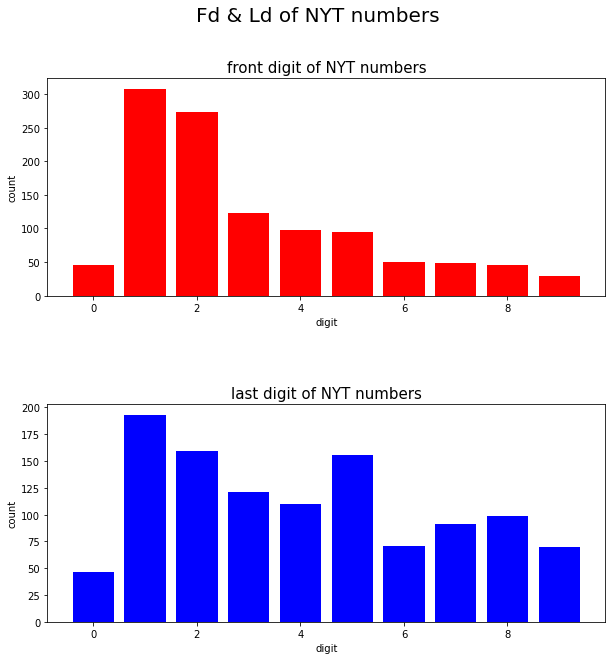

In [56]:
x=[0,1,2,3,4,5,6,7,8,9] # digits

plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.4,hspace=0.5)

# plot of first digit count of NYT numbers
plt.subplot(2,1,1)
plt.bar(x,NYT_front_count,color='r')
plt.title('front digit of NYT numbers',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of last digit count of NYT numbers
plt.subplot(2,1,2)
plt.bar(x,NYT_last_count,color='b')
plt.title('last digit of NYT numbers',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

plt.suptitle('Fd & Ld of NYT numbers',fontsize=20)

### Analyze

From the histogram result, front digit of 1 returned the most from New York Times text file and last digit also returned 1 as most usage from New York Times.

We will be checking the possible reason why 1 returned the most.

While the total count of numbers are 1,115, find out how many digits each number consists of.

In [57]:
len(NYT_num) # length of numbers included word

1115

Below shows there are no digits consisted of 5 or greater.

In [58]:
morethan4_digits = re.findall(r'\b\s*\d{5,}\s*\b',NYT) # word that contains 5 or more digits
morethan4_digits

[]

Therefore, we check through 1 to 4 digits.

In [59]:
one_digit = re.findall(r'\b\s*\d{1}\s*\b',NYT) # word that contains 1 digit
len(one_digit)

287

In [60]:
one_data = pd.DataFrame(one_digit,columns=["1number"]) # convert to pandas dataframe

In [61]:
one_front = one_data["1number"].apply(fd) # apply first digit function

In [62]:
one_front_count= pd.Index(one_front).value_counts().sort_index() # return counted values with sorted index
one_front_count

0     2
1    58
2    50
3    43
4    29
5    32
6    22
7    21
8    17
9    13
Name: 1number, dtype: int64

In [63]:
two_digits = re.findall(r'\b\s*\d{2}\s*\b',NYT) # word that contains 2 digits
len(two_digits)

442

In [64]:
two_data = pd.DataFrame(two_digits,columns=["2numbers"]) # convert to pandas dataframe

In [65]:
two_front = two_data["2numbers"].apply(fd) # apply first digit functionb

In [66]:
two_front_count= pd.Index(two_front).value_counts().sort_index() # return counted values with sorted index
two_front_count

1    130
2     83
3     58
4     51
5     41
6     23
7     20
8     24
9     12
Name: 2numbers, dtype: int64

While count for 0 is none, we add missing index for plot below

In [67]:
two_front_count = list(two_front_count) # convert to list
two_front_count.insert(0,0) # insert values that are missing

In [68]:
three_digits = re.findall(r'\b\s*\d{3}\s*\b',NYT) # word that contains 3 digits
len(three_digits)

209

In [69]:
three_data = pd.DataFrame(three_digits,columns=["3numbers"]) # convert to pandas dataframe

In [70]:
three_front = three_data["3numbers"].apply(fd) # apply first digit function

In [71]:
three_front_count= pd.Index(three_front).value_counts().sort_index() # return counted values with sorted index
three_front_count

0    44
1    56
2    32
3    20
4    16
5    21
6     5
7     6
8     5
9     4
Name: 3numbers, dtype: int64

In [72]:
four_digits = re.findall(r'\b\s*\d{4}\s*\b',NYT) # word that contains 4 digits
len(four_digits)

177

In [73]:
four_data = pd.DataFrame(four_digits,columns=["4numbers"]) # convert to pandas dataframe

In [74]:
four_front = four_data["4numbers"].apply(fd) # apply first digit function

In [75]:
four_front_count= pd.Index(four_front).value_counts().sort_index() # return counted values with sorted index
four_front_count

1     64
2    108
3      2
4      1
5      1
7      1
Name: 4numbers, dtype: int64

While count for 0,6,8, and 9 is none, we add missing index for plot below

In [76]:
four_front_count = list(four_front_count) # convert to list
four_front_count.insert(0,0) # insert values that are missing
four_front_count.insert(6,0) # insert values that are missing
four_front_count.insert(8,0) # insert values that are missing
four_front_count.insert(9,0) # insert values that are missing
four_front_count

[0, 64, 108, 2, 1, 1, 0, 1, 0, 0]

As we add the lengths of 1 to 4 digits numbers, it match to our original count as shown below 

In [77]:
287+442+209+177

1115

We can now get the last digits from 1 to 4 digits.

In [78]:
one_back = one_data["1number"].apply(ld) # apply last digit function

In [79]:
one_back_count= pd.Index(one_back).value_counts().sort_index() # return counted values with sorted index
one_back_count

0     2
1    58
2    50
3    43
4    29
5    32
6    22
7    21
8    17
9    13
Name: 1number, dtype: int64

In [80]:
two_back = two_data["2numbers"].apply(ld) # apply last digit function

In [81]:
two_back_count= pd.Index(two_back).value_counts().sort_index() # return counted values with sorted index
two_back_count

1    69
2    68
3    56
4    56
5    72
6    27
7    29
8    40
9    25
Name: 2numbers, dtype: int64

While count for 0 is none, we add missing index for plot below

In [82]:
two_back_count = list(two_back_count) # convert to list
two_back_count.insert(0,0) # insert values that are missing

In [83]:
three_back = three_data["3numbers"].apply(ld) # apply last digit function

In [84]:
three_back_count= pd.Index(three_back).value_counts().sort_index() # return counted values with sorted index
three_back_count

0    44
1    32
2    28
3    16
4    12
5    37
6    10
7    12
8    10
9     8
Name: 3numbers, dtype: int64

In [85]:
four_back = four_data["4numbers"].apply(ld) # apply last digit function

In [86]:
four_back_count= pd.Index(four_back).value_counts().sort_index() # return counted values with sorted index
four_back_count

1    34
2    13
3     6
4    13
5    14
6    12
7    29
8    32
9    24
Name: 4numbers, dtype: int64

While count for 0 is none, we add missing index for plot below

In [87]:
four_back_count = list(four_back_count) # convert to list
four_back_count.insert(0,0) # insert values that are missing

Now we can view the histogram plots of first and last digits of each.

Text(0.5, 0.98, 'Fd & Ld of 1 to 4 digits NYT numbers')

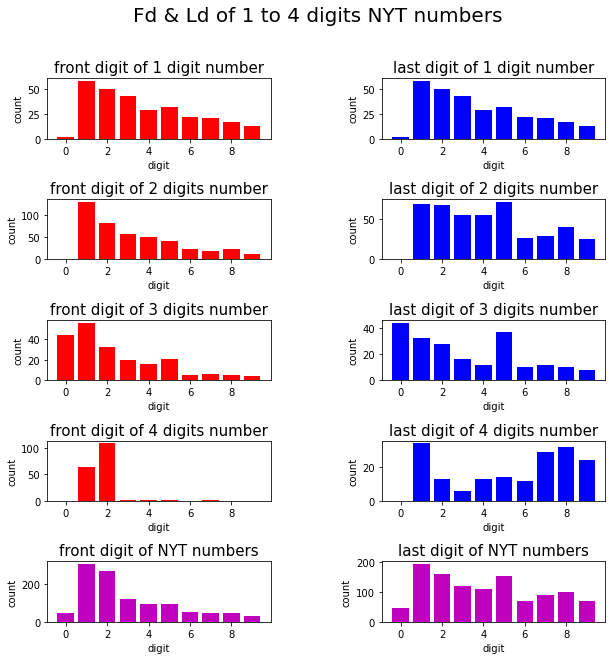

In [88]:
x=[0,1,2,3,4,5,6,7,8,9] # digits

plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.5,hspace=1.0)

# plot of first digit count of NYT 1 digit numbers
plt.subplot(5,2,1)
plt.bar(x,one_front_count,color='r')
plt.title('front digit of 1 digit number',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of last digit count of NYT 1 digit numbers
plt.subplot(5,2,2)
plt.bar(x,one_back_count,color='b')
plt.title('last digit of 1 digit number',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of first digit count of NYT 2 digit numbers
plt.subplot(5,2,3)
plt.bar(x,two_front_count,color='r')
plt.title('front digit of 2 digits number',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of last digit count of NYT 2 digit numbers
plt.subplot(5,2,4)
plt.bar(x,two_back_count,color='b')
plt.title('last digit of 2 digits number',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of first digit count of NYT 3 digit numbers
plt.subplot(5,2,5)
plt.bar(x,three_front_count,color='r')
plt.title('front digit of 3 digits number',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of last digit count of NYT 3 digit numbers
plt.subplot(5,2,6)
plt.bar(x,three_back_count,color='b')
plt.title('last digit of 3 digits number',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of first digit count of NYT 4 digit numbers
plt.subplot(5,2,7)
plt.bar(x,four_front_count,color='r')
plt.title('front digit of 4 digits number',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of last digit count of NYT 4 digit numbers
plt.subplot(5,2,8)
plt.bar(x,four_back_count,color='b')
plt.title('last digit of 4 digits number',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of first digit count of total NYT numbers
plt.subplot(5,2,9)
plt.bar(x,NYT_front_count,color='m')
plt.title('front digit of NYT numbers',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

# plot of last digit count of total NYT numbers
plt.subplot(5,2,10)
plt.bar(x,NYT_last_count,color='m')
plt.title('last digit of NYT numbers',fontsize=15)
plt.ylabel("count",fontsize=10)
plt.xlabel("digit",fontsize=10)

plt.suptitle('Fd & Ld of 1 to 4 digits NYT numbers',fontsize=20)

According to histogram result of first digit & last digit count, 1 is most used at two digits number.

Looking at the four digit numbers, they mostly returned values that shows __year__.
Therefore, 2 was dominant in front digit of 4 digit numbers (1xxx~ 2xxx).

Looking at the three digit numbers, the median value was 200. Hence, 100's value were dominant which tells 1 is mostly used.

Looking at the two digit numbers, 1 was mostly used while the median was 30. Possible reason could be the dates which 1 and 2 have more probability usage.

Looking at the one digit numbers, 1 was also dominant while the median value was 3.

While there are 442 of 2 digit numbers, they take about 40% of total numbers(1,115). 
Therefore, 1 was mostly used in total.

For the last digits, there was no clear pattern for 1 being used the most. However, since front and last digit of one digit numbers are equal, 1 was used the most same as front digit.

Comparing results between previous CSV files with NYT text file, they all used 1 the most as front digit and no specific pattern found for last digit. We can assume, 1 has the most probability usage in data.

## Conclusion

Through the project, we used our first & last digit function to csv files and text file to analyze the pattern.

While there were no clear pattern found on last digit values, first digit values had one interesting pattern.

Despite the type of file or information of data, they all returned 1 as the most used digit.

2 Possible reason for first digit to be 1 from analyze, 1 had more probability to be used frequently and dates were indicated which years have 1 and 2 frequently, months have 1 more frequently, and finally dates have 1 and 2 more frequently made first digit 1 to be more used.

